In [24]:
%matplotlib notebook

import math
import numpy as np
import matplotlib.pyplot as plt
import sympy

import geometrik.threed as g3d

import goto.globe
from goto.globe.blip import Blip
from goto.globe.plot import GlobePlotMpl

In [25]:
BOD = Blip(44.828333, -0.715556).as_vector
MXP = Blip(45.63, 8.723056).as_vector
MRS = Blip(43.436667, 5.215).as_vector
LHR = Blip(51.4775, -0.461389).as_vector
LIS = Blip(38.774167, -9.134167).as_vector
RKV = Blip(64.13, -21.940556).as_vector
SYD = Blip(-33.946111, 151.177222).as_vector
PRY = Blip(-25.653611, 28.224167).as_vector
SVO = Blip(55.972778, 37.414722).as_vector
SIN = Blip(1.359167, 103.989444).as_vector

In [26]:
def wsk_arc_radius_to_aperture(Ax, Bx, r) :
    a_mini = Ax.angle_to(Bx) / 2.0
    print("a_mini = ", a_mini)
    a_maxi = math.pi / 2.0
    print("a_maxi = ", a_maxi)
    a_abs = abs(r / goto.globe.earth_radius)
    print("a_abs = ", a_abs)
    a_bounded = max(a_mini, min(a_abs, a_maxi))
    print("a_bounded = ", a_bounded)

    return math.copysign(a_bounded, r)

def wsk_arc_def(Ax, Bx, radius, is_large_arc=False) :
    w = math.copysign(1.0, radius)
    k = -1.0 if is_large_arc else 1.0

    aperture = wsk_arc_radius_to_aperture(Ax, Bx, radius)
    print("aperture =", aperture)
    
    Qx = (Ax + Bx).normalized()
    Qy = (Bx @ Ax).normalized()
    Qz = Qx @ Qy
    
    deflection = w * k * math.acos(min((math.cos(aperture) / (Ax * Qx)), math.pi / 2.0))
    print("deflection =", deflection)
    
    Cx = g3d.Vector.compose(Qx, Qy, deflection)
    Cz = Qz
    Cy = w * Cx @ Cz

    Az = w * (Ax @ Cx).normalized()
    Ay = w * (Cx @ Az)

    Bz = w * (Bx @ Cx).normalized()
    By = w * (Cx @ Bz)
    
    with GlobePlotMpl() as plt :
        plt.add_point(Ax, "Ax", "orange")
        plt.add_point(Bx, "Bx", "cyan")
        plt.add_point(Qx, "Qx", "r")
        plt.add_point(Qy, "Qy", "g")
        plt.add_point(Qz, "Qz", "b")
        plt.add_point(Cx, "Cx", "magenta")
        plt.add_point(Cy, "Cy", "purple")
        plt.add_point(Cz, "Cz", "k")
        plt.add_signed_arc(Ax, Bx, Cx, w)
        
    return Cx, Qz


In [ ]:
Ax, Bx = LIS, SVO

Ax = Blip(0.0, 0.0).as_vector
Bx = Blip(45.0, 0.0).as_vector
radius = 3000000.0

Ax = Blip(0.0, 0.0).as_vector
Bx = Blip(45.0, 45.0).as_vector
Cw = Blip(0.0, 45.0).as_vector

In [ ]:
aperture = Ax.angle_to(Cw)
radius = aperture * goto.globe.earth_radius

with GlobePlotMpl() as plt :
    plt.add_point(Ax, 'Ax')
    plt.add_point(Bx, 'Bx')
    plt.add_point(Cw, 'Cw')
    plt.add_circle(Cw, Ax)
    plt.add_circle(Cw, aperture)
    
radius

In [27]:
Ax = Blip(0.013704756572792697, 0.0).as_vector
Bx = Blip(0.020000000646338355, 0.006295243810737046).as_vector
radius = 700.0

a_mini =  7.769175370648397e-05
a_maxi =  1.5707963267948966
a_abs =  0.00010987271013381107
a_bounded =  0.00010987271013381107
aperture = 0.00010987271013381107
deflection = 7.76917250676577e-05


<IPython.core.display.Javascript object>


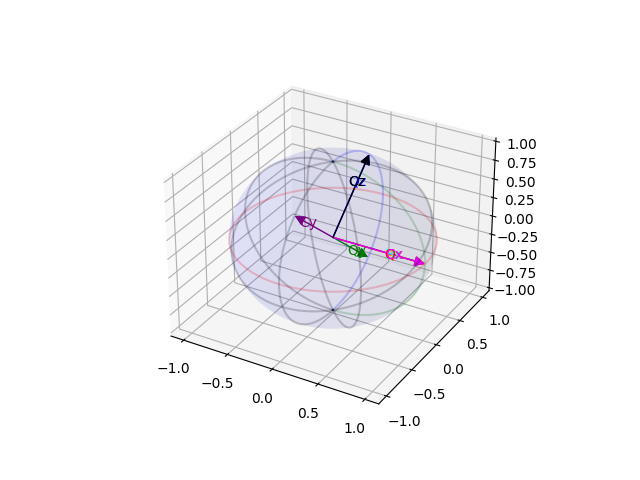

700.0000087787774
700.000002341109
Blip(0.013704758000403749, 0.006295242826017774) / [0.9999999653573121, 0.00010987271116240482, 0.00023919314801530028]
[-0.00024682683992279474, 0.7071067381071031, 0.7071067811865785]


In [33]:
Cx, Qz = wsk_arc_def(Ax, Bx, radius)

print(Cx.angle_to(Ax) * goto.globe.earth_radius)
print(Cx.angle_to(Bx) * goto.globe.earth_radius)

print(Blip.from_vector(Cx))
print(Qz)

a_mini =  7.769175370648397e-05
a_maxi =  1.5707963267948966
a_abs =  0.00010987271013381107
a_bounded =  0.00010987271013381107
aperture = -0.00010987271013381107
deflection = -7.76917250676577e-05


<IPython.core.display.Javascript object>


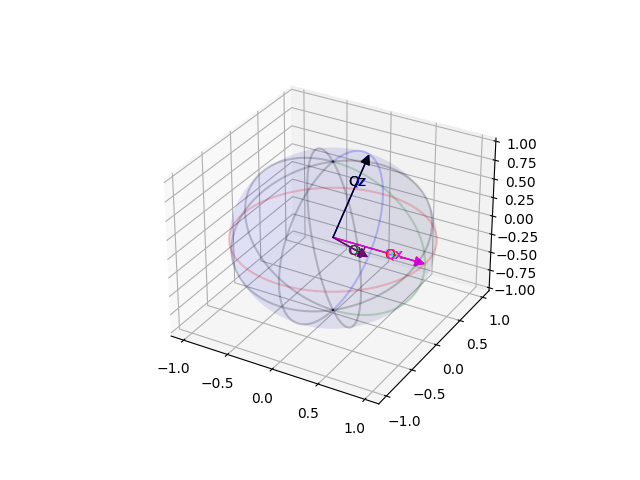

Blip(0.019999999218727305, 7.812771284202225e-10) / [0.9999999390765214, 1.3635857430715527e-11, 0.0003490658296743779]
[-0.00024682683992279474, 0.7071067381071031, 0.7071067811865785]


In [21]:
Cx, Qz = wsk_arc_def(Ax, Bx, -radius)

print(Blip.from_vector(Cx))
print(Qz)

a_mini =  0.3926990816987242
a_abs =  0.4708830434306189
a_bounded =  0.4708830434306189
aperture = 0.4708830434306189
deflection = -0.2668992985747146


<IPython.core.display.Javascript object>


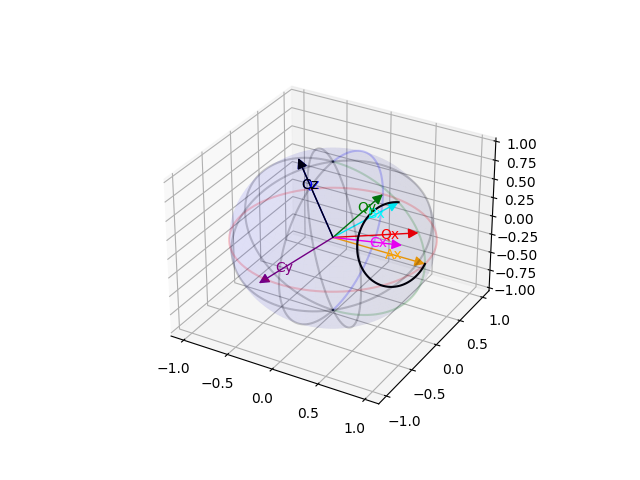

[0.8911680223810186, -0.2637417934617733, 0.36913388122342794]
[-0.3826834323650899, 0.0, 0.9238795325112867]


In [7]:
Cx, Qz = wsk_arc_def(Ax, Bx, radius, True)
print(Cx)
print(Qz)

a_mini =  0.3926990816987242
a_abs =  0.3924025361921824
a_bounded =  0.3926990816987242
aperture = -0.3926990816987242
deflection = 0.0


<IPython.core.display.Javascript object>


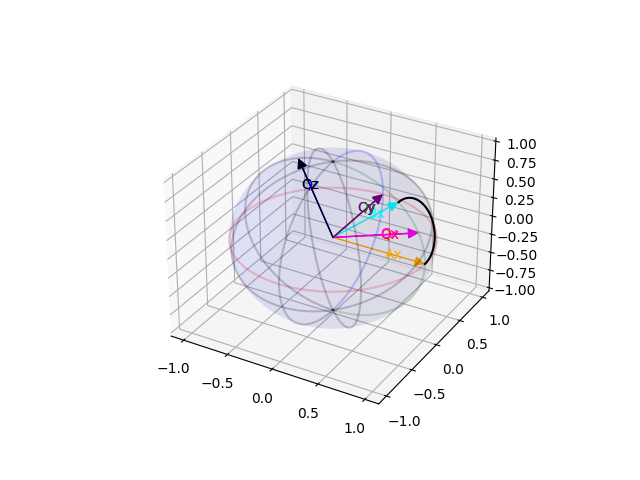

(Vector(0.924, 0, 0.383), Vector(-0.383, 0, 0.924))

In [8]:
wsk_arc_def(Ax, Bx, -2500000.0, True)

In [9]:
radius_mini = Ax.angle_to(Bx) * goto.globe.earth_radius / 2
radius_maxi = goto.globe.earth_radius
radius_bounded = math.copysign(max(radius_mini, min(abs(radius), radius_maxi)), radius)
radius_mini, radius_bounded, radius_maxi

(2501889.2940232973, 3000000.0, 6371008.7714)

In [10]:
Qx = (Ax + Bx).normalized()
Qy = (Bx @ Ax).normalized()

In [11]:
goto.globe.earth_radius * 1e-17

6.371008771400001e-11

<IPython.core.display.Javascript object>


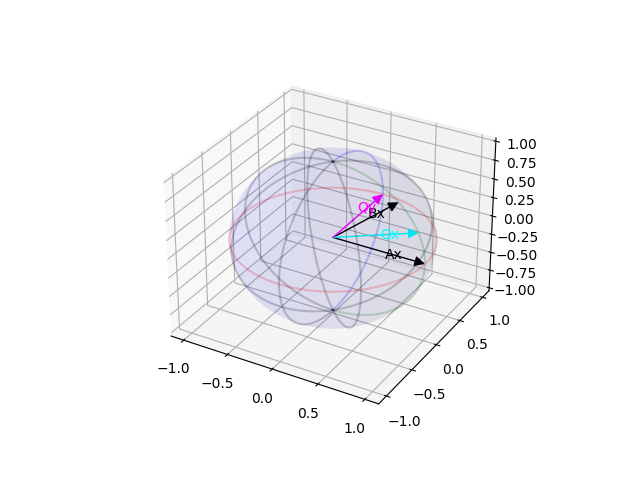

In [12]:
with GlobePlotMpl() as plt :
    plt.add_point(Ax, "Ax")
    plt.add_point(Bx, "Bx")
    plt.add_point(Qx, "Qx", "cyan")
    plt.add_point(Qy, "Qy", "magenta")